2024-11-02 16:32:51.652451: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1730561571.676955   70512 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1730561571.683503   70512 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-02 16:32:51.724579: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/cs/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `in

Epoch 1/100


I0000 00:00:1730561586.679656   70607 service.cc:148] XLA service 0x77e0dc003940 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1730561586.679685   70607 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2024-11-02 16:33:06.745699: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1730561587.047841   70607 cuda_dnn.cc:529] Loaded cuDNN version 90300


 18/625 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.0979 - loss: 3.4001 

I0000 00:00:1730561592.298807   70607 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.2436 - loss: 2.3033 - val_accuracy: 0.3595 - val_loss: 1.8446 - learning_rate: 0.0010
Epoch 2/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.4772 - loss: 1.4608 - val_accuracy: 0.5205 - val_loss: 1.3695 - learning_rate: 0.0010
Epoch 3/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.5470 - loss: 1.2761 - val_accuracy: 0.6220 - val_loss: 1.0710 - learning_rate: 0.0010
Epoch 4/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.5794 - loss: 1.1888 - val_accuracy: 0.6326 - val_loss: 1.0393 - learning_rate: 0.0010
Epoch 5/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.6057 - loss: 1.1252 - val_accuracy: 0.6323 - val_loss: 1.0244 - learning_rate: 0.0010
Epoch 6/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.6250 - loss: 1.0769 - val_accuracy: 0.6232 - val_loss: 1.0883 - learning_rate: 0.0010
Epoch 7/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.6392 - loss: 1.0308 - val

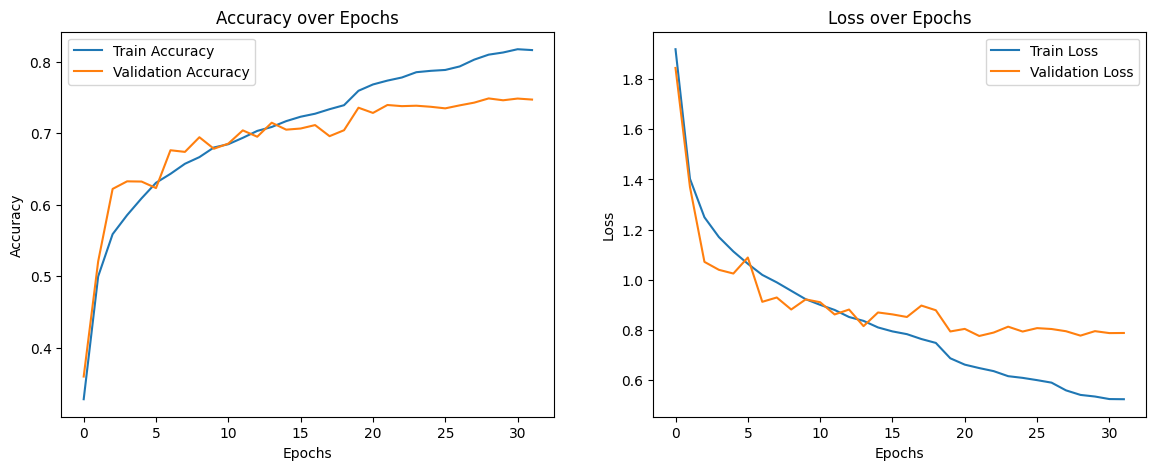

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7414 - loss: 0.7895
Test Loss: 0.7942
Test Accuracy: 0.7414
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


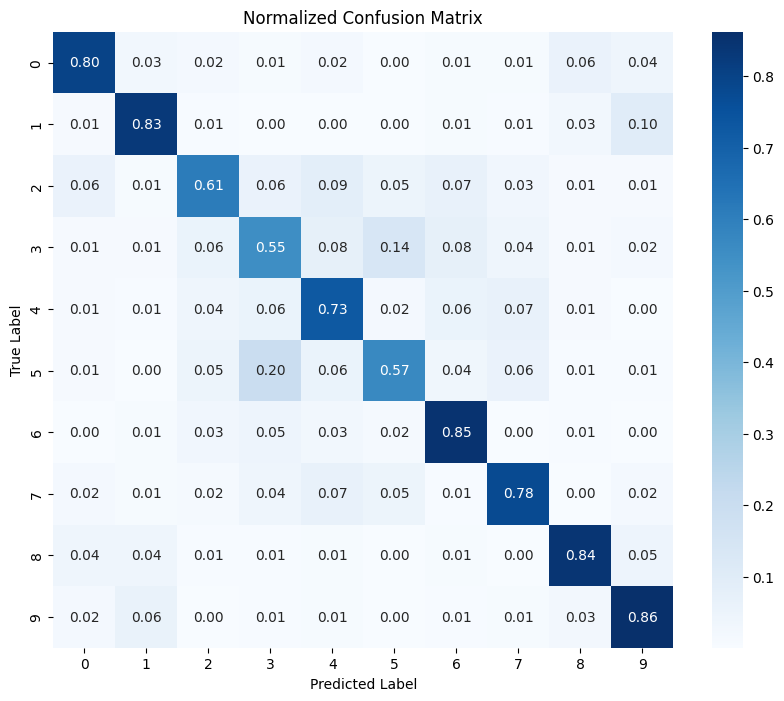


Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.80      0.80      1000
           1       0.82      0.83      0.83      1000
           2       0.73      0.61      0.66      1000
           3       0.56      0.55      0.56      1000
           4       0.67      0.73      0.70      1000
           5       0.67      0.57      0.61      1000
           6       0.75      0.85      0.80      1000
           7       0.77      0.78      0.77      1000
           8       0.84      0.84      0.84      1000
           9       0.77      0.86      0.82      1000

    accuracy                           0.74     10000
   macro avg       0.74      0.74      0.74     10000
weighted avg       0.74      0.74      0.74     10000



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Ensure TensorFlow is set up correctly
assert tf.__version__ >= "2.0", "This code requires TensorFlow 2.0 or higher."

# Set random seeds for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

# Constants
INPUT_SHAPE = (32, 32, 6)  # 6 channels for real and imaginary parts of each RGB channel
NUM_CLASSES = 10
BATCH_SIZE = 64
EPOCHS = 100
LEARNING_RATE = 0.001

def load_and_preprocess_data():
    """
    Loads the CIFAR-10 dataset and preprocesses it for training with FFT applied
    to the data, returning the real and imaginary parts as separate channels.
    """
    (x_train, y_train), (x_test, y_test) = cifar10.load_data()

    # Normalize the images to [0, 1] range
    x_train = x_train.astype('float32') / 255.0
    x_test = x_test.astype('float32') / 255.0

    # Apply FFT to each image and separate the real and imaginary parts
    def fft_transform(data):
        fft_data = np.fft.fft2(data, axes=(1, 2))  # Apply FFT to the spatial dimensions
        fft_data_shifted = np.fft.fftshift(fft_data, axes=(1, 2))  # Shift zero frequency to center
        real_part = np.real(fft_data_shifted)
        imag_part = np.imag(fft_data_shifted)
        # Concatenate real and imaginary parts along the last axis to create separate channels
        return np.concatenate([real_part, imag_part], axis=-1)

    # Transform the training and test data
    x_train_fft = fft_transform(x_train)
    x_test_fft = fft_transform(x_test)

    # One-hot encode the labels
    y_train = to_categorical(y_train, NUM_CLASSES)
    y_test = to_categorical(y_test, NUM_CLASSES)

    return x_train_fft, y_train, x_test_fft, y_test

def build_model(input_shape, num_classes):
    """
    Builds a simpler CNN model for CIFAR-10 classification.
    """
    model = Sequential()

    # First Convolutional Block
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    # Second Convolutional Block
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    # Third Convolutional Block
    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.4))

    # Fully Connected Layers
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=LEARNING_RATE),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

def get_callbacks():
    """
    Returns a list of callbacks for training.
    """
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    model_saver = ModelCheckpoint('best_simple_cnn_cifar10_fft.keras', monitor='val_accuracy', mode='max', save_best_only=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)

    return [early_stopping, model_saver, reduce_lr]

def train_model(model, x_train, y_train, x_val, y_val, batch_size, epochs):
    """
    Trains the CNN model on the training data.
    """
    callbacks = get_callbacks()

    history = model.fit(x_train, y_train,
                        validation_data=(x_val, y_val),
                        batch_size=batch_size,
                        epochs=epochs,
                        callbacks=callbacks,
                        verbose=1)

    return history

def evaluate_model(model, x_test, y_test):
    """
    Evaluates the trained model on the test data.
    """
    loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
    print(f"Test loss: {loss:.4f}")
    print(f"Test accuracy: {accuracy:.4f}")

    return loss, accuracy

# Load and preprocess data
x_train, y_train, x_test, y_test = load_and_preprocess_data()

# Split the training data into training and validation sets
x_val, y_val = x_train[-10000:], y_train[-10000:]
x_train, y_train = x_train[:-10000], y_train[:-10000]

# Build the model
model = build_model(INPUT_SHAPE, NUM_CLASSES)

# Train the model
history = train_model(model, x_train, y_train, x_val, y_val, BATCH_SIZE, EPOCHS)

# Evaluate the model on the test set
evaluate_model(model, x_test, y_test)

# Function to plot training and validation curves
def plot_training_history(history):
    # Plot accuracy
    plt.figure(figsize=(14, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(loc='upper left')

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')

    plt.show()

# Call the plot function after training
plot_training_history(history)

# Load the saved model
model = load_model('best_simple_cnn_cifar10_fft.keras')

# Normalize the test data
X_test_fft = x_test  # Already processed in load_and_preprocess_data()

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test_fft, y_test, verbose=1)

# Print the evaluation metrics
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Get predictions for the confusion matrix
Y_pred = model.predict(X_test_fft)
Y_pred_classes = np.argmax(Y_pred, axis=1)  # Convert one-hot predictions to class labels

# Normalize the confusion matrix
conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), Y_pred_classes)
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Plot the normalized confusion matrix using seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_normalized, annot=True, fmt='.2f', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title('Normalized Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Classification report for precision, recall, f1-score for each class
print("\nClassification Report:\n", classification_report(np.argmax(y_test, axis=1), Y_pred_classes))
